In [1]:
import sys
import os
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
from scipy.stats import zscore
from collections import Counter
import scanpy as sc
import warnings
from matplotlib.patches import Rectangle, Patch

sys.path.insert(0, '../4_preffect')
from _config import configs
from preffect_factory import factory
import anndata as ad 
from _inference import( Inference )

In [ ]:

def list_subfolders(directory):
    subfolders = [entry.name for entry in os.scandir(directory) if entry.is_dir()]
    return subfolders


folder_search = f'/path/to/dataset_omega_subtype_4/'


all_subfolders = sorted(list_subfolders(folder_search))

all_subfolders = all_subfolders[3:4]

print("All sub-folders:", all_subfolders)

All sub-folders: ['EP1000_M500_NB_NoMCAR_XW2000_DAW20000_KLW.1_DKL.1_rprime50']


Half-decent runs so far:
EP1000_M500_NB_NoMCAR_XW2000_DAW20000_KLW.1_DKL.1_rprime50
EP1001_M200_NB_NoMCAR_XW200_DAW200_KLW.1_DKL.1_rprime50 [second place]


Bad (A/B mixing, poor PAM50 splitting, etC):
EP2000_M200_NB_NoMCAR_XW2000_DAW20000_KLW.1_DKL.1_rprime50
EP2000_M500_NB_NoMCAR_XW2000_DAW20000_KLW.1_DKL.1_rprime50
EP1001_M200_NB_NoMCAR_XW20000_DAW20000_KLW.1_DKL.1_rprime50
EP250_M500_NB_NoMCAR_XW2000_DAW20000_KLW.1_DKL.1_rprime25
EP500_M500_NB_NoMCAR_XW2000_DAW20000_KLW.1_DKL.1_rprime25
EP1001_M500_NB_NoMCAR_XW200_DAW200_KLW.1_DKL.1_rprime50
EP1001_M500_NB_NoMCAR_XW20000_DAW200_KLW.1_DKL.1_rprime50

Terrible primary:
EP1000_M200_NB_NoMCAR_XW2000_DAW20000_KLW.1_DKL.1_rprime25
EP1000_M200_NB_NoMCAR_XW2000_DAW20000_KLW1_DKL1_rprime25


Literally garbage
EP1001_M500_NB_NoMCAR_XW2_DAW2000_KLW.1_DKL.1_rprime50
EP1001_M500_NB_NoMCAR_XW200_DAW2_KLW.1_DKL1_rprime50

Load a specific run to this page. We are just interested in the first one, 
basic_M_1000_minibatch_200_epochs_1000_lr_0.001_lib_False_likelihood_NB_masking_MCAR_2_lambda_0.0

In [3]:
configs['task'] = 'reinstate'

pr_reinstate = {}
pr_count = 0

for dir_name in all_subfolders:

    dir_name = re.sub(r'\s+', '', dir_name)
    full_path = folder_search + "/" + dir_name
    configs['output_path'] = full_path
    configs['cuda_device_num'] = 4
    pr_reinstate[pr_count] = factory(task='reinstate', configs=configs, trigger_setup=True)

    configs['always_save'] = False
    pr_count += 1

In [4]:
pr_data = pr_reinstate[0]
#print(pr_data.train_dataset.gene_names[965])

# so position 965 is ERBB2 and 966 is ESR1
configs_inf = pr_data.configs.copy()
configs_inf['task'] = 'inference'
inference_instance = Inference(pr_data, task='inference', inference_key = configs_inf['inference_key'], configs=configs_inf)
inference_instance.run_inference()
inference_instance.configs_inf['inference_key'] = 'endogenous'
inference_instance.register_inference_run()



In [5]:
print(pr_data.train_dataset.anndatas_orig[0].obs["subtype"].value_counts())

LumA     264
Her2     255
Basal    246
LumB     235
Name: subtype, dtype: int64


In [6]:
endo = pr_data.inference_dict['endogenous']
endo.output['C1_full']

[tensor([[  -3.7849, -123.6969,  -63.8920,  ...,  -53.0750,   54.7041,
          -147.3699],
         [  -3.4860, -119.2981,  -61.3706,  ...,  -52.0139,   55.0416,
          -146.7120],
         [  -3.3159, -121.7648,  -62.4015,  ...,  -52.9177,   54.1973,
          -144.2926],
         ...,
         [ -27.2192,  -23.3163,  -24.9870,  ...,  -41.3893,   95.9797,
           -57.1619],
         [ -27.0815,  -23.1084,  -24.9012,  ...,  -41.3538,   95.8163,
           -56.7389],
         [ -27.0922,  -23.1027,  -24.8862,  ...,  -41.3435,   95.8182,
           -56.7415]], device='cuda:2')]

/home/UWO/emucaki/miniconda3/envs/ffpe_env_gpu/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/home/UWO/emucaki/miniconda3/envs/ffpe_env_gpu/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/UWO/emucaki/miniconda3/envs/ffpe_env_gpu/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


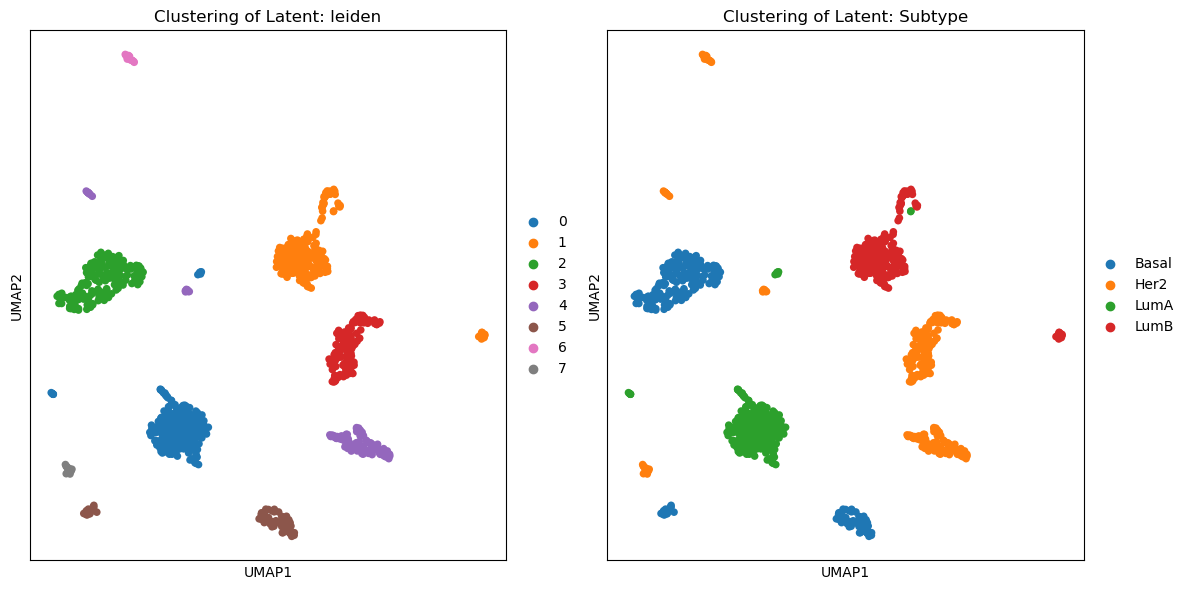

/home/UWO/emucaki/miniconda3/envs/ffpe_env_gpu/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/UWO/emucaki/miniconda3/envs/ffpe_env_gpu/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


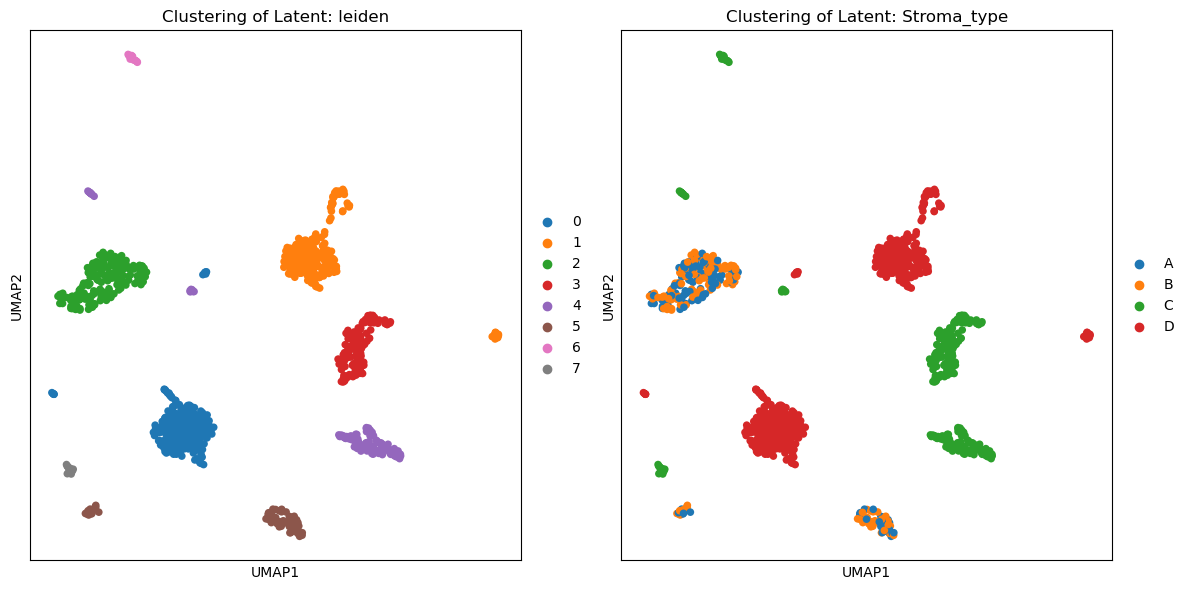

In [7]:
# Cluster_Latent and Cluster_counts are broken, I'll try to fix here cause it's faster than constantly reloading dataset
color_by='leiden'

inf_reinstate = pr_reinstate[0].inference_dict['endogenous']
adata = inf_reinstate.return_latent_space_as_anndata()
adata = adata[0][:1000].copy()

adata.layers["C1_full"] = endo.output['C1_full'][0]

sc.pp.neighbors(adata, n_neighbors=10, use_rep='X')  # Adjust n_neighbors based on your dataset
sc.tl.umap(adata)

# ensuring 5 Leiden clusters
resolution = 1

while True:
            sc.tl.leiden(adata, resolution=resolution)
            num_clusters = adata.obs['leiden'].nunique()
            # print(f'Resolution: {resolution}, Clusters: {num_clusters}')

            if num_clusters <= 5:
                break
            elif resolution <= 0.01:
                # break if Leiden fails to give <=5 clusters
                resolution = 0.1
                break
            elif resolution <= 0.2:
                resolution -= 0.01
            else:
                resolution -= 0.1  # decrease resolution


fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # Adjust figsize as needed
sc.pl.umap(adata, color=color_by, ax=axes[0], show=False, title='Clustering of Latent: ' + color_by)
sc.pl.umap(adata, color='subtype', ax=axes[1], show=False, title='Clustering of Latent: Subtype')
            
plt.tight_layout()
plt.show()


fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # Adjust figsize as needed
sc.pl.umap(adata, color=color_by, ax=axes[0], show=False, title='Clustering of Latent: ' + color_by)
sc.pl.umap(adata, color='stroma_type', ax=axes[1], show=False, title='Clustering of Latent: Stroma_type')
            
plt.tight_layout()
plt.show()



/home/UWO/emucaki/miniconda3/envs/ffpe_env_gpu/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/home/UWO/emucaki/miniconda3/envs/ffpe_env_gpu/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/UWO/emucaki/miniconda3/envs/ffpe_env_gpu/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


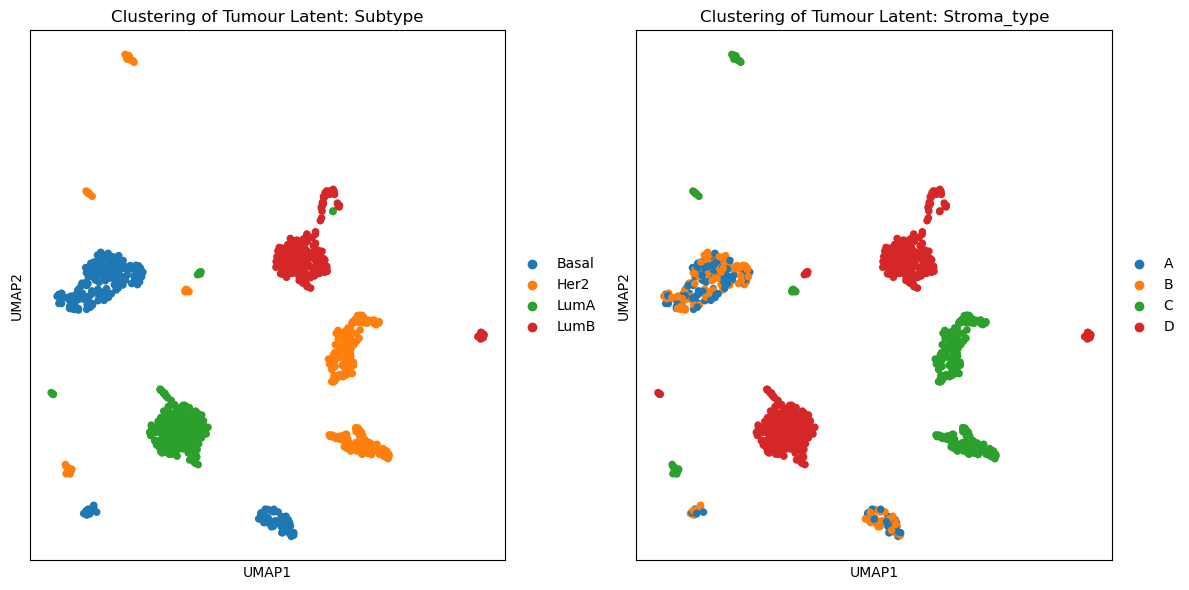

In [8]:
# Repeat but just the tumours (the first 1000 entries
adata = inf_reinstate.return_latent_space_as_anndata()
adata_tumour_tissue = adata[0][:1000].copy()
adata_tumour_tissue.layers['C1_full'] = endo.output['C1_full'][0]

sc.pp.neighbors(adata_tumour_tissue, n_neighbors=10, use_rep='X')  # Adjust n_neighbors based on your dataset
sc.tl.umap(adata_tumour_tissue)

# side-by-side without leiden
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # Adjust figsize as needed
sc.pl.umap(adata_tumour_tissue, color='subtype', ax=axes[0], show=False, title='Clustering of Tumour Latent: Subtype')
sc.pl.umap(adata_tumour_tissue, color='stroma_type', ax=axes[1], show=False, title='Clustering of Tumour Latent: Stroma_type')
                
plt.tight_layout()
plt.show()

/home/UWO/emucaki/miniconda3/envs/ffpe_env_gpu/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/UWO/emucaki/miniconda3/envs/ffpe_env_gpu/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


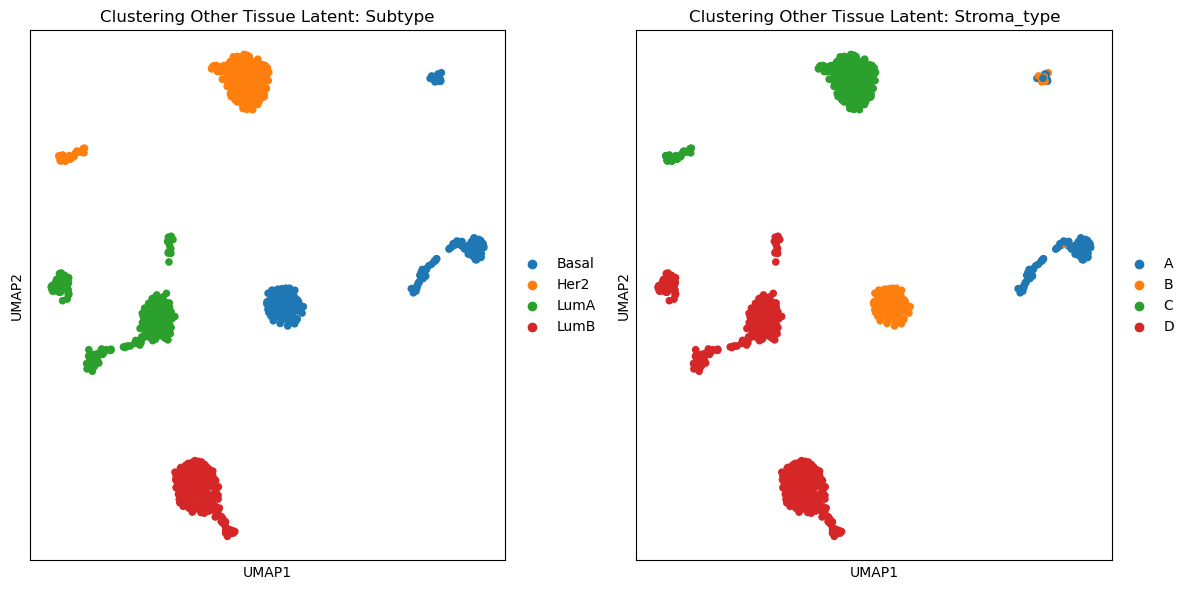

In [9]:
# Repeat but just the "other" tissue (the rest of the entries)
#for i in range(30):

#    print(i+5)
adata = inf_reinstate.return_latent_space_as_anndata()
adata_other_tissue = adata[1][:1000].copy()

sc.pp.neighbors(adata_other_tissue, n_neighbors=20, use_rep='X')  # Adjust n_neighbors based on your dataset
sc.tl.umap(adata_other_tissue)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # Adjust figsize as needed
sc.pl.umap(adata_other_tissue, color='subtype', ax=axes[0], show=False, title='Clustering Other Tissue Latent: Subtype')
sc.pl.umap(adata_other_tissue, color='stroma_type', ax=axes[1], show=False, title='Clustering Other Tissue Latent: Stroma_type')
                
plt.tight_layout()
plt.show()

/home/UWO/emucaki/miniconda3/envs/ffpe_env_gpu/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/UWO/emucaki/miniconda3/envs/ffpe_env_gpu/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/UWO/emucaki/miniconda3/envs/ffpe_env_gpu/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/UWO/emucaki/miniconda3/envs/ffpe_env_gpu/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


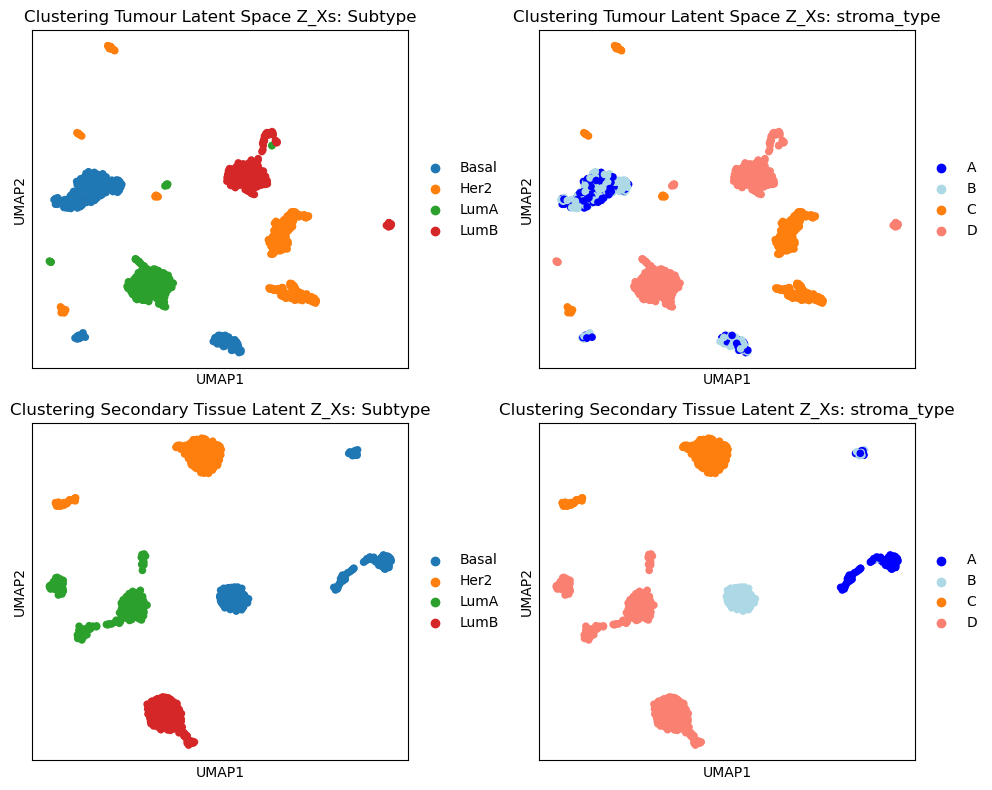

In [10]:
# Lets draw them all together, but maybe a combined colour scheme
palette = ["blue", "lightblue", "#ff7f0e", "salmon", "firebrick"] 

fig, axes = plt.subplots(2, 2, figsize=(10, 8))  # Adjust figsize as needed
sc.pl.umap(adata_tumour_tissue, color='subtype', ax=axes[0,0], show=False, title='Clustering Tumour Latent Space Z_Xs: Subtype')
sc.pl.umap(adata_other_tissue, color='subtype', ax=axes[1,0], show=False, title='Clustering Secondary Tissue Latent Z_Xs: Subtype')
     
sc.pl.umap(adata_tumour_tissue, color='stroma_type', ax=axes[0,1], palette=palette, show=False, title='Clustering Tumour Latent Space Z_Xs: stroma_type')
sc.pl.umap(adata_other_tissue, color='stroma_type', ax=axes[1,1], palette=palette, show=False, title='Clustering Secondary Tissue Latent Z_Xs: stroma_type')
            
plt.tight_layout()
plt.show()

/home/UWO/emucaki/miniconda3/envs/ffpe_env_gpu/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/UWO/emucaki/miniconda3/envs/ffpe_env_gpu/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/UWO/emucaki/miniconda3/envs/ffpe_env_gpu/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/UWO/emucaki/miniconda3/envs/ffpe_env_gpu/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


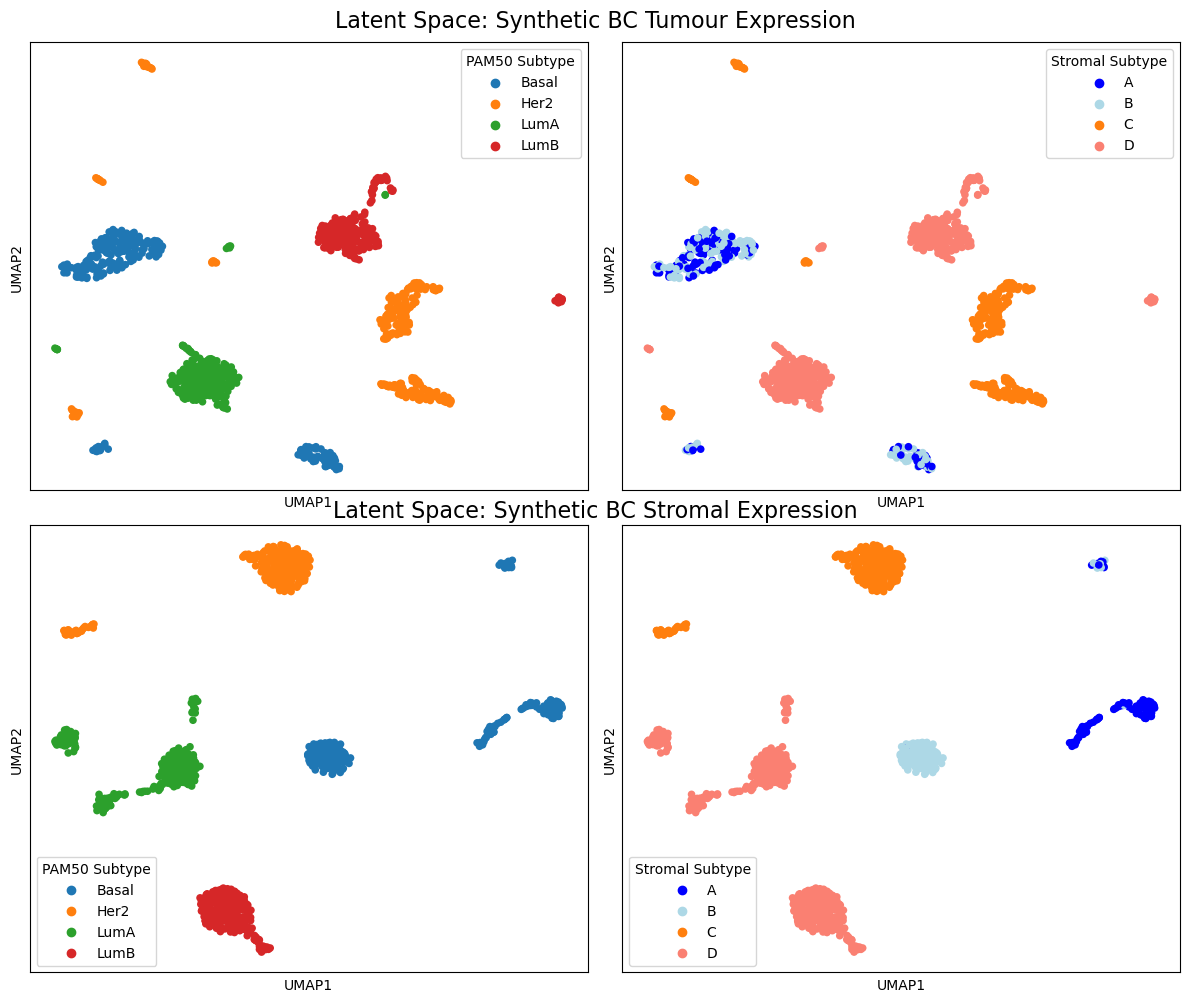

In [ ]:

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plotting the UMAPs
sc.pl.umap(
    adata_tumour_tissue,
    color='subtype',
    ax=axes[0,0],
    show=False,
    title=''
)
handles, labels = axes[0,0].get_legend_handles_labels()
legend = axes[0,0].legend(handles, labels, title='PAM50 Subtype')

sc.pl.umap(
    adata_other_tissue,
    color='subtype',
    ax=axes[1,0],
    show=False,
    title=''
)
handles, labels = axes[1,0].get_legend_handles_labels()
legend = axes[1,0].legend(handles, labels, title='PAM50 Subtype')

sc.pl.umap(
    adata_tumour_tissue,
    color='stroma_type',
    ax=axes[0,1],
    palette=palette,
    show=False,
    title=''
)
handles, labels = axes[0,1].get_legend_handles_labels()
legend = axes[0,1].legend(handles, labels, title='Stromal Subtype')


sc.pl.umap(
    adata_other_tissue,
    color='stroma_type',
    ax=axes[1,1],
    palette=palette,
    show=False,
    title=''
)
handles, labels = axes[1,1].get_legend_handles_labels()
legend = axes[1,1].legend(handles, labels, title='Stromal Subtype')

# Add a centered title above the upper two plots
fig.text(0.5, 0.98, 'Latent Space: Synthetic BC Tumour Expression', ha='center', fontsize=16)
fig.text(0.5, 0.49, 'Latent Space: Synthetic BC Stromal Expression', ha='center', fontsize=16)
plt.subplots_adjust(hspace=-1.5) 
plt.tight_layout(rect=[0, 0, 1, 0.98])

# Save the figure as a PDF
plt.savefig('/path/to/umap_plots.pdf', format='pdf')

# Display the plot
plt.show()


In [12]:
print(adata_tumour_tissue.obs)

               subtype stroma_type
train_tau1_0     Basal           B
train_tau1_1     Basal           B
train_tau1_2     Basal           A
train_tau1_3     Basal           B
train_tau1_4     Basal           B
...                ...         ...
train_tau1_995    LumB           D
train_tau1_996    LumB           D
train_tau1_997    LumB           D
train_tau1_998    LumB           D
train_tau1_999    LumB           D

[1000 rows x 2 columns]


/home/UWO/emucaki/miniconda3/envs/ffpe_env_gpu/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/home/UWO/emucaki/miniconda3/envs/ffpe_env_gpu/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/UWO/emucaki/miniconda3/envs/ffpe_env_gpu/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/UWO/emucaki/miniconda3/envs/ffpe_env_gpu/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/UWO/emucaki/miniconda3/envs/ffpe_env_gpu/lib/python3.9/site-packages/scanpy/plotting/_tools

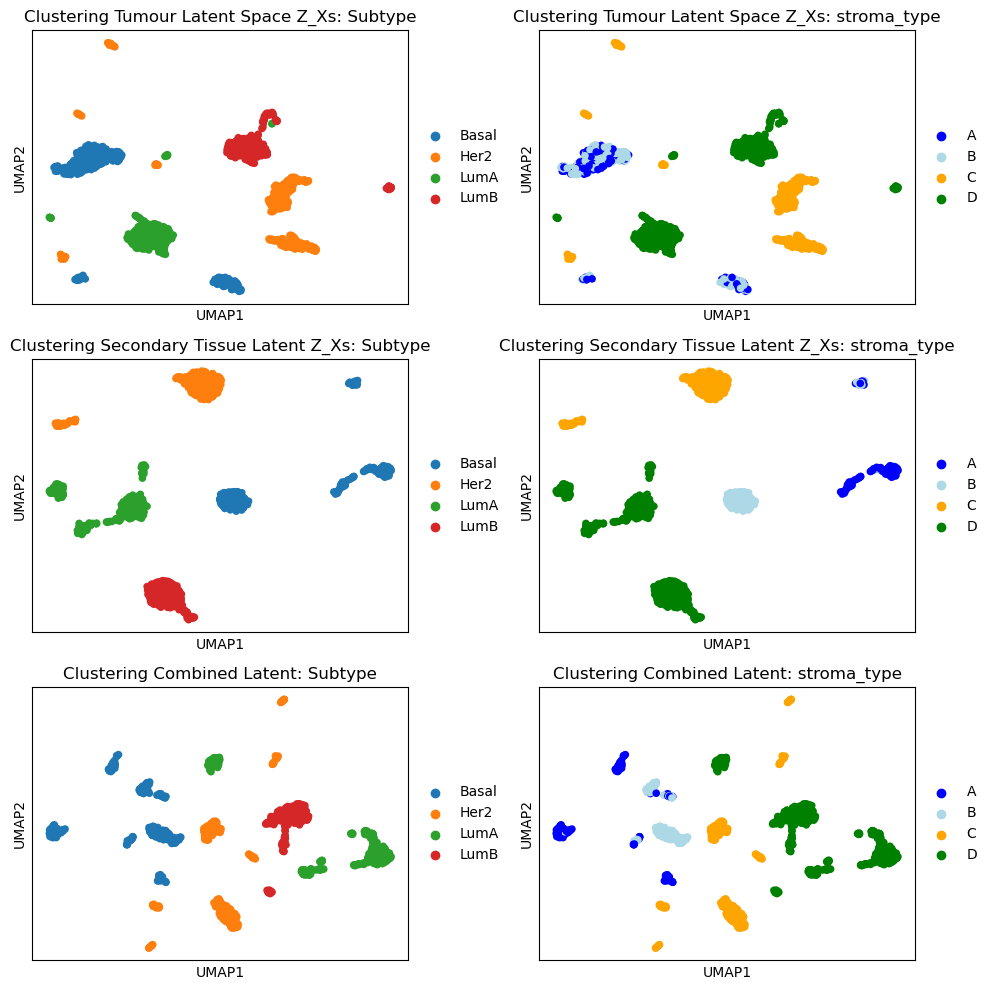

In [13]:
adata_C1 = ad.AnnData(X=np.copy(adata_tumour_tissue.layers['C1_full'].cpu()))
adata_C1.obs = adata_tumour_tissue.obs
sc.pp.neighbors(adata_C1, n_neighbors=10, use_rep='X')  # Adjust n_neighbors based on your dataset
sc.tl.umap(adata_C1)

# But actually, we could instead colour them every colour together, e.g. Basal-A, Basal-B, Her2, LumA-D, LumA-E, LumB-D, LumB-E
palette = ["blue", "lightblue", "orange", "green", "red"] 

fig, axes = plt.subplots(3, 2, figsize=(10, 10))  # Adjust figsize as needed
sc.pl.umap(adata_tumour_tissue, color='subtype', ax=axes[0,0], show=False, title='Clustering Tumour Latent Space Z_Xs: Subtype')
sc.pl.umap(adata_other_tissue, color='subtype', ax=axes[1,0], show=False, title='Clustering Secondary Tissue Latent Z_Xs: Subtype')
sc.pl.umap(adata_C1, color='subtype', ax=axes[2,0], show=False, title='Clustering Combined Latent: Subtype')


sc.pl.umap(adata_tumour_tissue, color='stroma_type', ax=axes[0,1], palette=palette, show=False, title='Clustering Tumour Latent Space Z_Xs: stroma_type')
sc.pl.umap(adata_other_tissue, color='stroma_type', ax=axes[1,1], palette=palette, show=False, title='Clustering Secondary Tissue Latent Z_Xs: stroma_type')
sc.pl.umap(adata_C1, color='stroma_type', ax=axes[2,1], palette=palette, show=False, title='Clustering Combined Latent: stroma_type')


plt.tight_layout()
plt.show()

In [14]:
# we want to change "stroma_type" from A/D

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

def create_clustermap(
    adata,
    subtype_col="subtype",
    stroma_col="stroma_type",
    method="complete",
    metric="euclidean",
    cmap="Reds",
    figsize=(10, 8),
    x_label="Samples",
    y_label="Latent",
    label_fontsize=8,
    scale_by=None,        # 'row', 'column', or None
    rotate_plot=False,
    title=""
):
    """
    Creates a Seaborn clustermap from an AnnData object.  
    
    1) Optionally scales each row or column via z-score.  
    2) Optionally 'rotates' the plot by transposing the data (so rows become columns).  
    3) Includes annotation bars for 'subtype' and 'stroma_type' if they exist in adata.obs.  
    4) Sets smaller font sizes for axis labels and tick labels.

    Parameters
    ----------
    adata : AnnData
        Contains .X (expression matrix) and .obs (sample annotations).
    subtype_col : str
        The column in adata.obs used for "subtype" annotation.
    stroma_col : str
        The column in adata.obs used for "stroma_type" annotation.
    method : str
        Linkage method (e.g. 'complete', 'average', 'ward').
    metric : str
        Distance metric (e.g. 'euclidean', 'correlation').
    cmap : str
        Colormap for the heatmap (default='Reds').
    figsize : tuple
        Size of the clustermap (width, height).
    x_label : str
        Label for x-axis in the final plot (default='Genes').
    y_label : str
        Label for y-axis in the final plot (default='Samples').
    label_fontsize : int
        Font size for axis labels and tick labels.
    scale_by : str or None
        If 'column', each column is z-scored.  
        If 'row', each row is z-scored.  
        If None, no scaling is performed.
    rotate_plot : bool
        If True, transpose the data so original rows become columns (effectively rotating the plot 90°).

    Returns
    -------
    None
        Displays the resulting clustermap.
    """
    # Renaming "subtype" and "stroma_type"
    subtype_rename_map = {
        "Basal": "basal",
        "Her2": "her2-enriched",
        "LumA": "luminal A",
        "LumB": "luminal B",
        "Normal": "normal-like"
    }   

    stroma_rename_map = {
        "A": "α",
        "B": "β",
        "C": "γ",
        "D": "δ",
        "E": "ε"
    }   

    if "subtype" in adata.obs:
        adata.obs["subtype"] = adata.obs["subtype"].replace(subtype_rename_map)
    if "stroma_type" in adata.obs:
        adata.obs["stroma_type"] = adata.obs["stroma_type"].replace(stroma_rename_map)

    # ---------------------------
    # 1) Prepare the DataFrame
    # ---------------------------
    df = pd.DataFrame(
        adata.X,
        index=adata.obs_names,   # typically samples/cells
        columns=adata.var_names  # typically genes
    )

    subtype_means = df.groupby(adata.obs[subtype_col]).mean()
    
    # Print the mean values
    #print("Mean latent space values for each subtype:")
    #print(subtype_means)
    
    # Calculate differences between subtype means
    stroma_means = df.groupby(adata.obs[stroma_col]).mean()
    
    # Print the mean values
    #print("Mean latent space values for each stroma type:")
    #print(stroma_means)
    

    # ---------------------------
    # 2) Optional Scaling
    # ---------------------------
    # If scale_by='column', we do standard (z-score) scaling per column.
    # If scale_by='row', we do standard (z-score) scaling per row.
    if scale_by == 'column':
        df = (df - df.median(axis=0))/df.std(axis=0)
    elif scale_by == 'column_median':
        df = (df - df.median(axis=0)) #/ df.std(axis=0)
    elif scale_by == 'row':
        # For each row, subtract its own mean and divide by its own std
        df = df.sub(df.median(axis=1), axis=0).div(df.std(axis=1), axis=0)

    # ---------------------------
    # 3) Prepare Annotation Bars
    # ---------------------------
    # The sample-level annotations go on the rows by default,
    # or on the columns if we rotate the data.
    row_colors_df = None
    col_colors_df = None
    legend_handles = []

    # Subtype annotation similar to UMAP colors
    subtype_palette = {
        "basal": "red",     
        "her2-enriched": "orange",
        "luminal A": "darkblue", 
        "luminal B": "lightblue",
        "normal-like": "green" 
    }

    subtypes = adata.obs[subtype_col].astype(str)
    unique_subtypes = subtypes.unique()
    subtype_colors = subtypes.map(subtype_palette)

    legend_handles = []
    for val in unique_subtypes:
    # val is your subtype label, e.g. "basal"
        legend_handles.append(
            mpatches.Patch(color=subtype_palette[val], label=f"{subtype_col}: {val}")
        )

    # Stroma annotation
    stroma_colors = None
    if stroma_col in adata.obs:
        stromas = adata.obs[stroma_col].astype(str)
        unique_stromas = stromas.unique()
        stroma_palette = sns.color_palette("muted", n_colors=len(unique_stromas))
        stroma_map = dict(zip(unique_stromas, stroma_palette))
        stroma_colors = stromas.map(stroma_map)

        # Build legend patches
        for val in unique_stromas:
            legend_handles.append(
                mpatches.Patch(color=stroma_map[val], label=f"{stroma_col}: {val}")
            )

    # Combine these annotation color columns into a single DataFrame
    if (subtype_colors is not None) or (stroma_colors is not None):
        annotation_df = pd.DataFrame(index=df.index)
        if subtype_colors is not None:
            annotation_df[subtype_col] = subtype_colors
        if stroma_colors is not None:
            annotation_df[stroma_col] = stroma_colors

        # Decide whether annotation bars belong to rows or columns based on rotate_plot
        if rotate_plot:
            # If we are transposing df, samples move to columns, so annotation is col_colors
            col_colors_df = annotation_df
        else:
            row_colors_df = annotation_df

    # ---------------------------
    # 4) Optionally transpose data to 'rotate' the heatmap
    # ---------------------------
    data_for_plot = df.T if rotate_plot else df

    print(np.min(np.min(data_for_plot)))

    mini = np.min(np.min(data_for_plot))
    maxi = np.max(np.max(data_for_plot))

    # Find if abs(mini) or maxi is greater, and set the other one to that value so 0 point is the middle
    largest_abs = max(abs(mini), abs(maxi))
    mini = -largest_abs
    maxi =  largest_abs
    # ---------------------------
    # 5) Create the Clustermap
    # ---------------------------
    g = sns.clustermap(
        data_for_plot,
        row_colors=row_colors_df,
        col_colors=col_colors_df,
        method=method,
        metric=metric,
        cmap=cmap,
        figsize=figsize,
        dendrogram_ratio=(0.2, 0.2),
        row_cluster=False,
        vmin=-50, vmax=50
    )

    # ---------------------------
    # 6) Adjust Axis Labels and Tick Fonts
    # ---------------------------
    labels_x = g.data2d.columns 
    labels_y = g.data2d.index
    #g.ax_heatmap.set_xticks(np.arange(len(labels_x)) + 0.5) 
    #g.ax_heatmap.set_xticklabels(labels_x, rotation=90)
    g.ax_heatmap.set_yticks(np.arange(len(labels_y)) + 0.5) 
    g.ax_heatmap.set_yticklabels(labels_y)

    #g.ax_heatmap.set_xlabel(x_label, fontsize=label_fontsize)
    #g.ax_heatmap.set_ylabel(y_label, fontsize=label_fontsize, rotation=45)
    #g.ax_heatmap.tick_params(axis='x', labelsize=label_fontsize)
    g.ax_heatmap.tick_params(axis='y', labelsize=label_fontsize)
    g.ax_heatmap.set_xlabel('')

    # Remove all x-axis tick locations
    g.ax_heatmap.set_xticks([])

    # Remove all x-axis tick labels
    g.ax_heatmap.set_xticklabels([])
    g.ax_heatmap.set_xlabel(x_label)
    g.ax_heatmap.set_ylabel(y_label)

    g.fig.suptitle(title, fontsize=14, x=0.5, y=1.02) 

    cbar = g.ax_heatmap.collections[0].colorbar

    # Manually set the desired tick locations and labels
    #cbar.set_ticks([-1, 0, 1, 2])
    #cbar.set_ticklabels(["-1", "0", "1", "2"])

    # ---------------------------
    # 7) Build the Legend (if we have annotation bars)
    # ---------------------------
    if legend_handles:
        g.ax_heatmap.legend(
            handles=legend_handles,
            loc="lower left",
            bbox_to_anchor=(-0.48, 0),
            title="Legend",
            prop={"size": 6}
        )

    write_path = "/path/to/latent_heatmap/"
    g.fig.savefig(write_path + title + ".pdf", format="pdf")
    plt.show()

In [37]:
import matplotlib.colors as mcolors
red_white_green = mcolors.LinearSegmentedColormap.from_list(
    "red_white_green", ["green", "white", "red"]
)

Tumour Latent Space
-66.0546875


/home/UWO/emucaki/miniconda3/envs/ffpe_env_gpu/lib/python3.9/site-packages/numpy/core/fromnumeric.py:85: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/home/UWO/emucaki/miniconda3/envs/ffpe_env_gpu/lib/python3.9/site-packages/numpy/core/fromnumeric.py:85: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
/home/UWO/emucaki/miniconda3/envs/ffpe_env_gpu/lib/python3.9/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


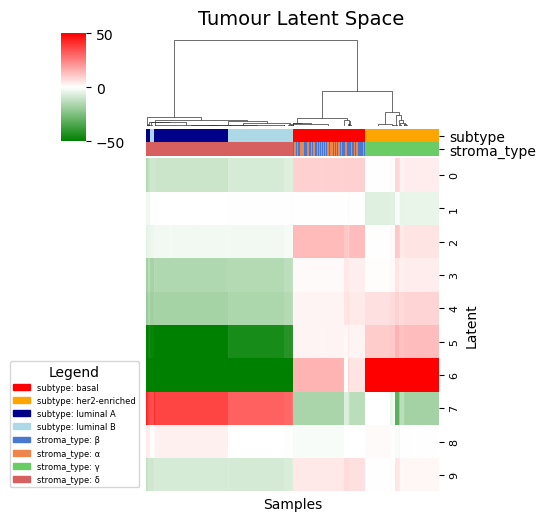

Stroma Latent Space
-33.425048828125


/home/UWO/emucaki/miniconda3/envs/ffpe_env_gpu/lib/python3.9/site-packages/numpy/core/fromnumeric.py:85: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/home/UWO/emucaki/miniconda3/envs/ffpe_env_gpu/lib/python3.9/site-packages/numpy/core/fromnumeric.py:85: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
/home/UWO/emucaki/miniconda3/envs/ffpe_env_gpu/lib/python3.9/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


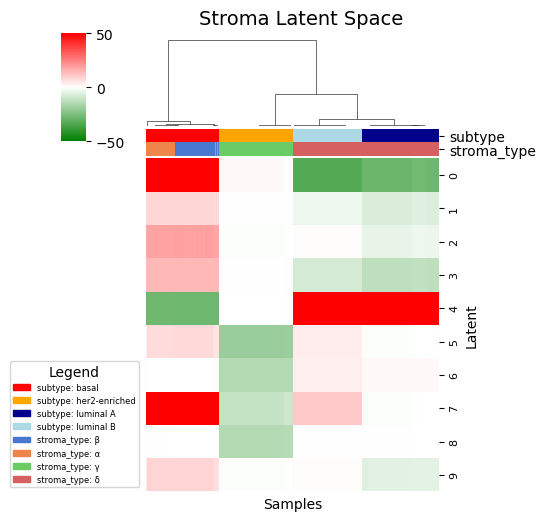

C1 (Combined) Latent Space
-95.51957702636719


/home/UWO/emucaki/miniconda3/envs/ffpe_env_gpu/lib/python3.9/site-packages/numpy/core/fromnumeric.py:85: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/home/UWO/emucaki/miniconda3/envs/ffpe_env_gpu/lib/python3.9/site-packages/numpy/core/fromnumeric.py:85: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
/home/UWO/emucaki/miniconda3/envs/ffpe_env_gpu/lib/python3.9/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


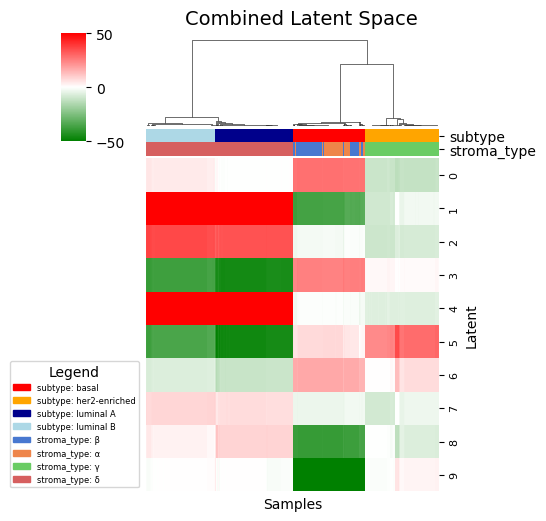

In [38]:
print("Tumour Latent Space")
create_clustermap(adata_tumour_tissue, scale_by="column_median", rotate_plot=True, figsize=(5, 6), title="Tumour Latent Space", cmap=red_white_green, method="average", metric="euclidean")
print("Stroma Latent Space")
create_clustermap(adata_other_tissue, scale_by="column_median", rotate_plot=True, figsize=(5, 6), title="Stroma Latent Space", cmap=red_white_green, method="average", metric="euclidean")
print("C1 (Combined) Latent Space")
create_clustermap(adata_C1, scale_by="column_median", rotate_plot=True, figsize=(5, 6), title="Combined Latent Space", cmap=red_white_green, method="average", metric="euclidean")

Heatmap of omega

Tumour Counts
-0.5231747627258301


/home/UWO/emucaki/miniconda3/envs/ffpe_env_gpu/lib/python3.9/site-packages/numpy/core/fromnumeric.py:85: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/home/UWO/emucaki/miniconda3/envs/ffpe_env_gpu/lib/python3.9/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


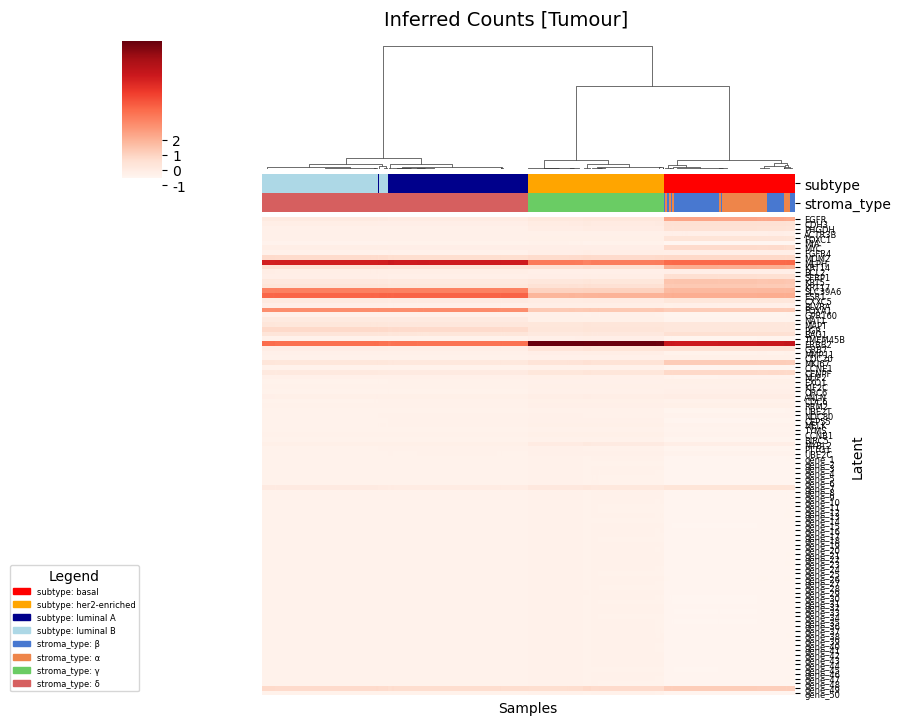

Stroma Counts
-0.5962513932980481


/home/UWO/emucaki/miniconda3/envs/ffpe_env_gpu/lib/python3.9/site-packages/numpy/core/fromnumeric.py:85: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/home/UWO/emucaki/miniconda3/envs/ffpe_env_gpu/lib/python3.9/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


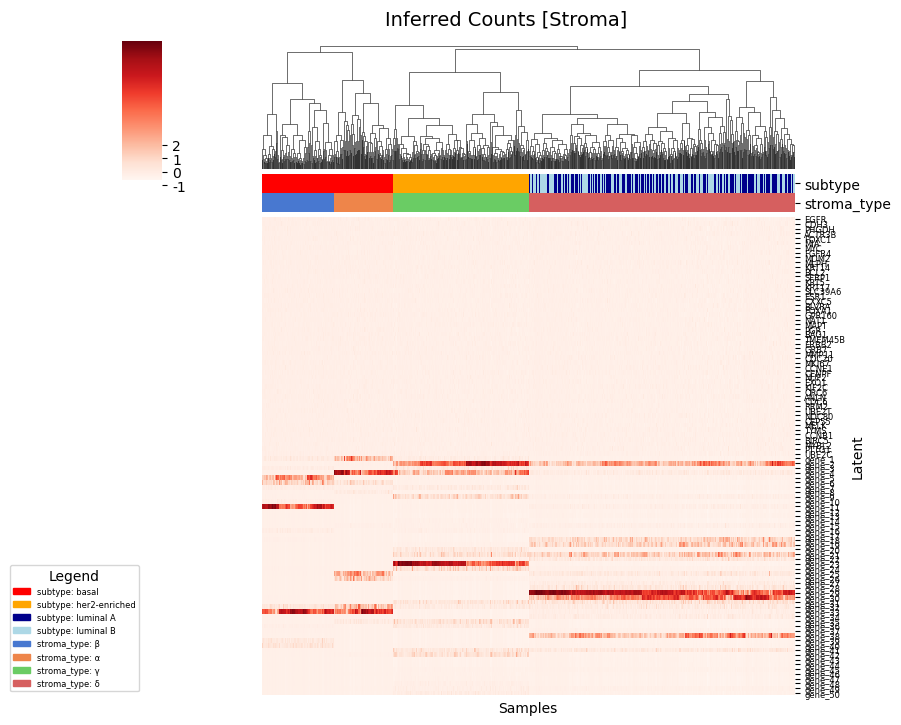

Tumour Omega
-0.5231747031211853


/home/UWO/emucaki/miniconda3/envs/ffpe_env_gpu/lib/python3.9/site-packages/numpy/core/fromnumeric.py:85: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/home/UWO/emucaki/miniconda3/envs/ffpe_env_gpu/lib/python3.9/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


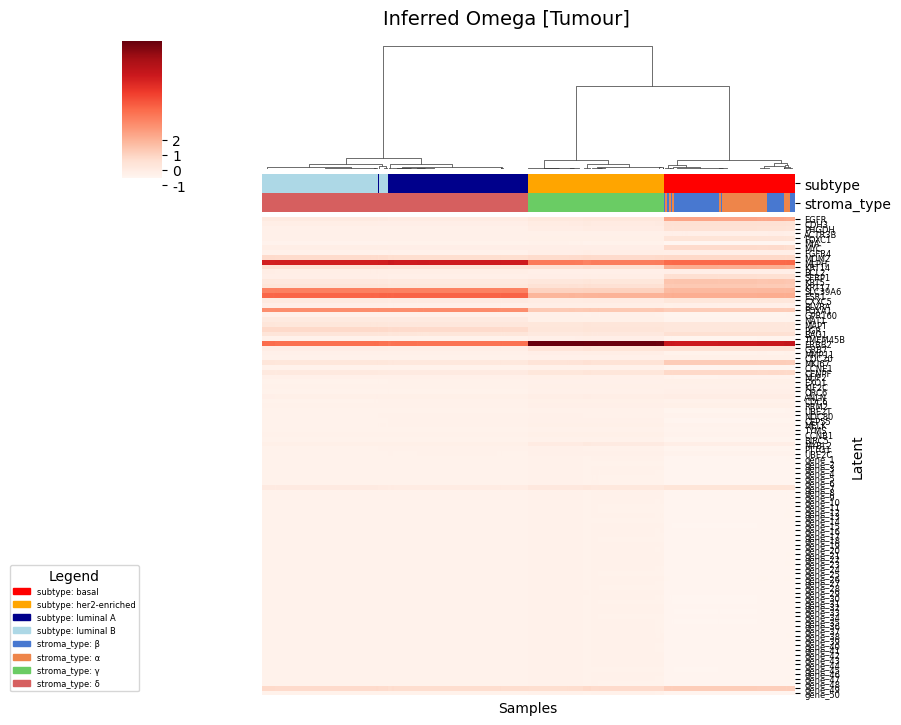

In [17]:
inf_reinstate = pr_reinstate[0].inference_dict['endogenous']
adata = inf_reinstate.return_counts_as_anndata()


print("Tumour Counts")
create_clustermap(adata[0], figsize=(8, 8), scale_by="row", rotate_plot=True, label_fontsize=6, title="Inferred Counts [Tumour]")
print("Stroma Counts")
create_clustermap(adata[1], figsize=(8, 8), scale_by="row", rotate_plot=True, label_fontsize=6, title="Inferred Counts [Stroma]")



adata[0].X = adata[0].layers['px_omega']
print("Tumour Omega")
create_clustermap(adata[0], figsize=(8, 8), scale_by="row", rotate_plot=True, label_fontsize=6, title="Inferred Omega [Tumour]")


True Counts

Tumour True Counts
-1.9565163270348096


/home/UWO/emucaki/miniconda3/envs/ffpe_env_gpu/lib/python3.9/site-packages/numpy/core/fromnumeric.py:85: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/home/UWO/emucaki/miniconda3/envs/ffpe_env_gpu/lib/python3.9/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


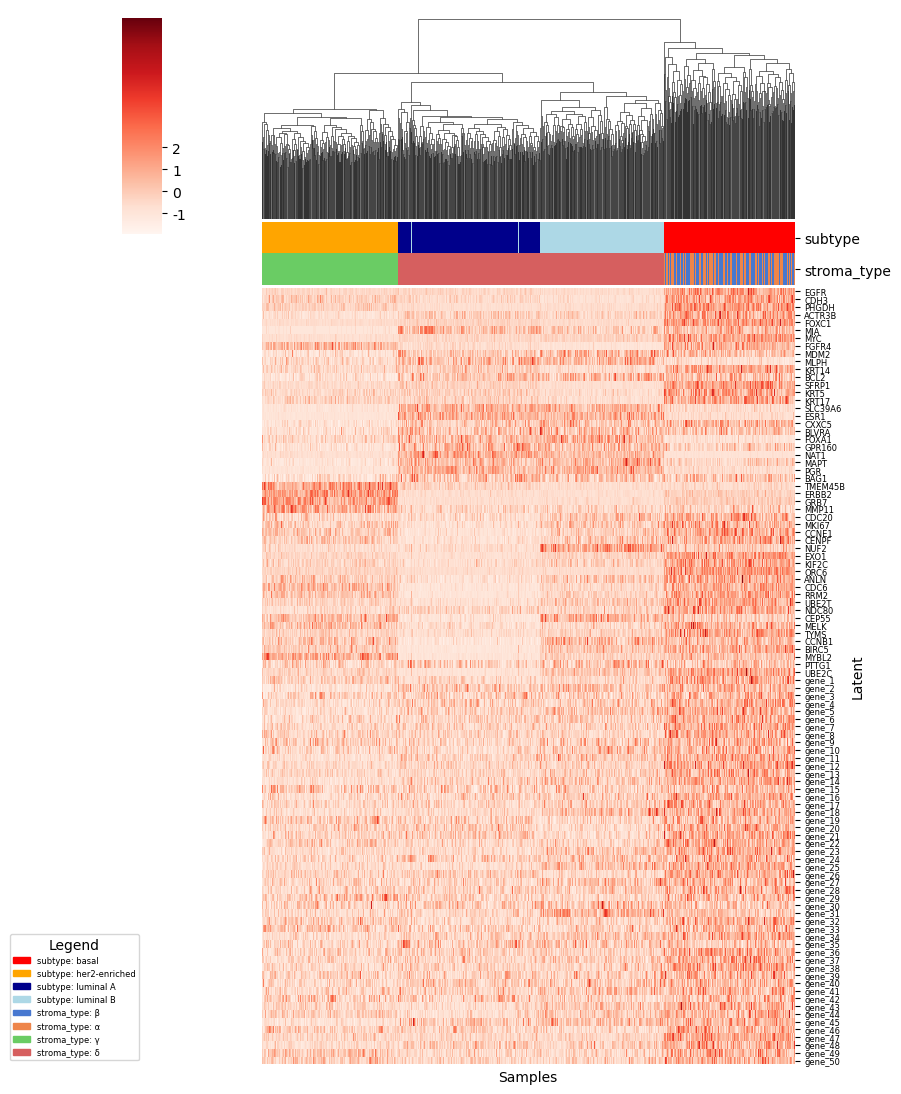

Stroma True Counts
-2.145659570006456


/home/UWO/emucaki/miniconda3/envs/ffpe_env_gpu/lib/python3.9/site-packages/numpy/core/fromnumeric.py:85: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/home/UWO/emucaki/miniconda3/envs/ffpe_env_gpu/lib/python3.9/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


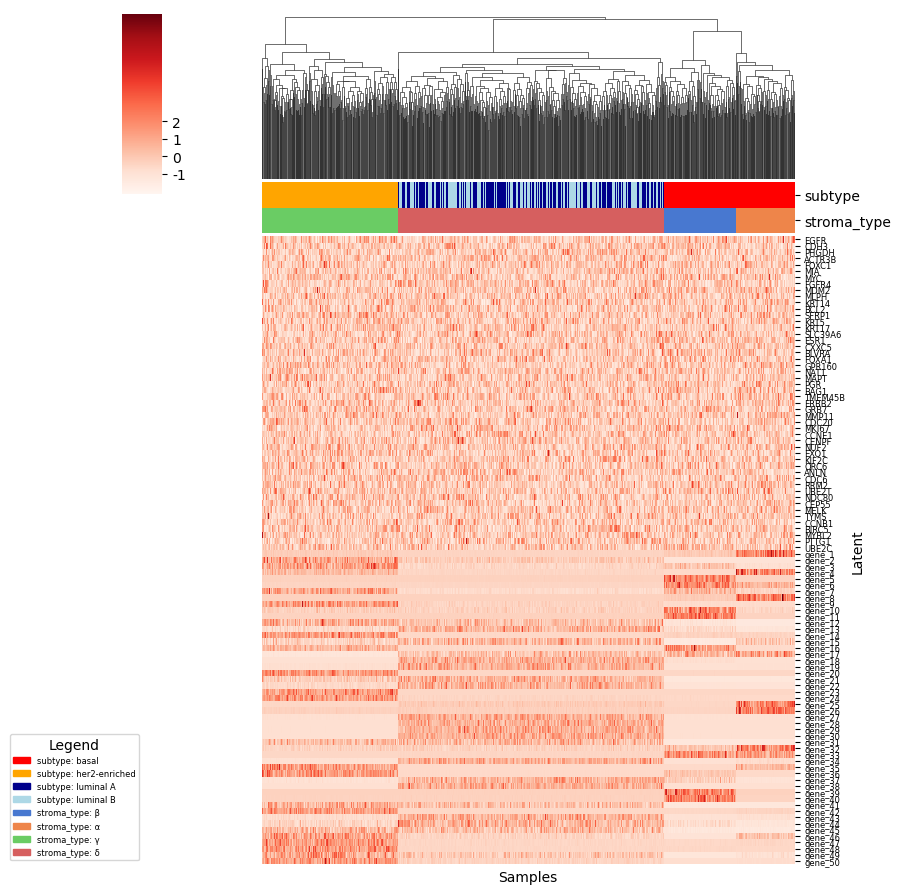

In [18]:
inf_reinstate = pr_reinstate[0].inference_dict['endogenous']
adata = inf_reinstate.return_counts_as_anndata()

adata[0].X = adata[0].layers["original_counts"]
adata[1].X = adata[1].layers["original_counts"]

print("Tumour True Counts")
create_clustermap(adata[0], figsize=(8, 12), scale_by="column", rotate_plot=True, label_fontsize=6)
print("Stroma True Counts")
create_clustermap(adata[1], figsize=(8, 10), scale_by="column", rotate_plot=True, label_fontsize=6)